[*********************100%***********************]  1 of 1 completed


Debug - S&P 500 momentum type: <class 'float'>, value: 0.17684781134439986


[*********************100%***********************]  1 of 1 completed


Debug - Dow Jones momentum type: <class 'float'>, value: 0.10397148989064298


[*********************100%***********************]  1 of 1 completed


Debug - Nasdaq momentum type: <class 'float'>, value: 0.2792193519291817


[*********************100%***********************]  1 of 1 completed


Debug - FTSE 100 momentum type: <class 'float'>, value: 0.059143865993449785


[*********************100%***********************]  1 of 1 completed


Debug - Nikkei 225 momentum type: <class 'float'>, value: 0.19025780033664907


[*********************100%***********************]  1 of 1 completed


Debug - DAX momentum type: <class 'float'>, value: 0.034427064272639196


[*********************100%***********************]  1 of 1 completed


Debug - CAC 40 momentum type: <class 'float'>, value: -0.021033818445729935


[*********************100%***********************]  1 of 1 completed


Debug - ASX 200 momentum type: <class 'float'>, value: 0.11061811053169013


[*********************100%***********************]  1 of 1 completed


Debug - Sensex momentum type: <class 'float'>, value: 0.09727551654235533


[*********************100%***********************]  1 of 1 completed


Debug - KOSPI momentum type: <class 'float'>, value: 0.31066484948027395


[*********************100%***********************]  1 of 1 completed


Debug - Straits Times momentum type: <class 'float'>, value: 0.09582702299651813


[*********************100%***********************]  1 of 1 completed


Debug - IPC Mexico momentum type: <class 'float'>, value: 0.1619034658495091


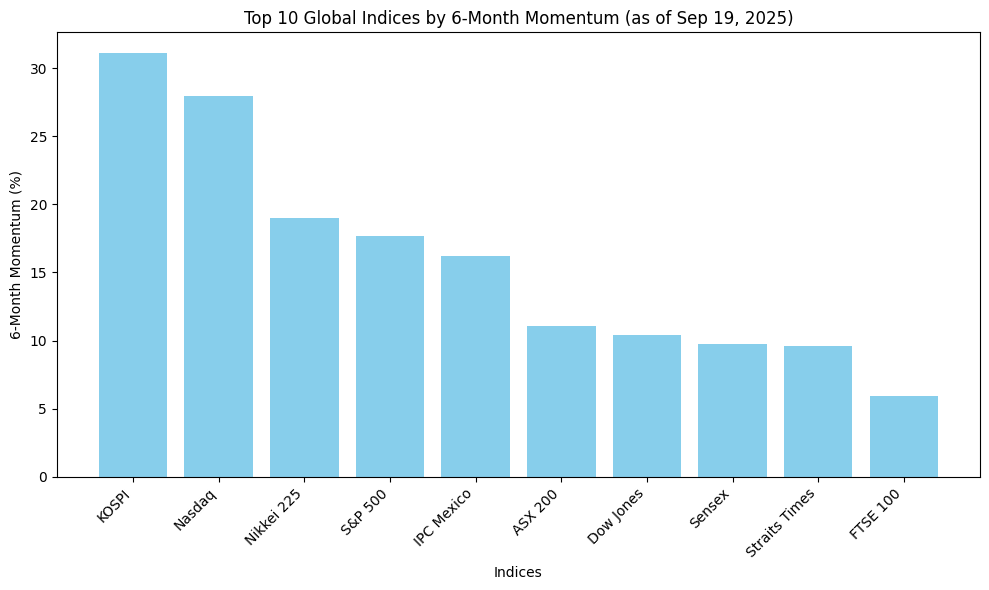

KOSPI: 31.07%
Nasdaq: 27.92%
Nikkei 225: 19.03%
S&P 500: 17.68%
IPC Mexico: 16.19%
ASX 200: 11.06%
Dow Jones: 10.40%
Sensex: 9.73%
Straits Times: 9.58%
FTSE 100: 5.91%


In [7]:
import yfinance as yf
import pandas as pd
import time
import matplotlib.pyplot as plt

def get_top_momentum_indices():
    # List of global indices (expand as needed)
    indices = {
        '^GSPC': 'S&P 500', '^DJI': 'Dow Jones', '^IXIC': 'Nasdaq',
        '^FTSE': 'FTSE 100', '^N225': 'Nikkei 225', '^GDAXI': 'DAX',
        '^FCHI': 'CAC 40', '^AORD': 'ASX 200', '^BSESN': 'Sensex',
        '^KS11': 'KOSPI', '^STI': 'Straits Times', '^MXX': 'IPC Mexico'
    }

    # Dictionary to store momentum
    momentum_data = {}

    # Fetch data and calculate 6-month momentum (126 trading days)
    for ticker, name in indices.items():
        try:
            data = yf.download(ticker, period='1y', interval='1d', auto_adjust=False)
            if len(data) < 126:
                print(f"Insufficient data for {name} ({ticker}): {len(data)} days")
                continue
            close_data = data['Close'].dropna()
            if len(close_data) < 126:
                print(f"Insufficient valid data for {name} ({ticker}): {len(close_data)} days")
                continue
            momentum_series = close_data.pct_change(periods=126)
            momentum = momentum_series.iloc[-1].item()
            print(f"Debug - {name} momentum type: {type(momentum)}, value: {momentum}")
            if not pd.isna(momentum):
                momentum_data[name] = momentum * 100
            time.sleep(1)
        except Exception as e:
            print(f"Error fetching {name} ({ticker}): {e}")

    # Sort and get top 10
    top_10 = sorted(momentum_data.items(), key=lambda x: x[1], reverse=True)[:10]

    return top_10

if __name__ == "__main__":
    # Example usage
    results = get_top_momentum_indices()
    names, momenta = zip(*results)  # Unzip into lists

    # Create bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(names, momenta, color='skyblue')
    plt.title('Top 10 Global Indices by 6-Month Momentum (as of Sep 19, 2025)')
    plt.xlabel('Indices')
    plt.ylabel('6-Month Momentum (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print results
    for name, momentum in results:
        print(f"{name}: {momentum:.2f}%")